In [1]:
# Multiple Correspondence Analysis (MCA) for identification of discriminitive SNPs

In [6]:
# Install prince library
!pip install prince

In [28]:
# Import dependencies
import pandas as pd
import prince
from sklearn.preprocessing import OneHotEncoder 
import numpy as np

In [2]:
# Load the dataset
file_path = './Resources/kidd_train.csv'
df = pd.read_csv(file_path, delimiter=',')
df.head()

,id,rs3737576,rs7554936,rs2814778,rs798443,rs1876482,rs1834619,rs3827760,rs260690,rs6754311,...,rs11652805,rs2042762,rs7226659,rs3916235,rs4891825,rs7251928,rs310644,rs2024566,superpopulation,gender
0,1762,TT,CC,CC,GG,GG,GG,AA,CC,CC,...,CC,TT,GG,TC,GG,CC,CC,AA,AFR,male
1,2503,TT,CT,TT,AA,GG,AA,AA,AA,CC,...,TT,TT,GT,CC,AA,AA,TT,AG,SAS,female
2,1525,TT,CC,TT,AA,GG,GG,AA,AA,TC,...,TT,TT,GG,CC,AA,AA,CC,AA,SAS,male
3,1624,TT,TT,TT,AG,GG,GG,AA,AA,CC,...,TT,TT,GG,CT,AG,AA,CT,AG,SAS,male
4,1684,TT,TT,TT,GA,GG,GG,AA,AA,TT,...,TT,TT,GG,CC,AA,AC,TC,GG,EUR,female


In [5]:
# Replace missing values with 'NN'
df_filled = df.fillna('NN')
df_filled.head()

,id,rs3737576,rs7554936,rs2814778,rs798443,rs1876482,rs1834619,rs3827760,rs260690,rs6754311,...,rs11652805,rs2042762,rs7226659,rs3916235,rs4891825,rs7251928,rs310644,rs2024566,superpopulation,gender
0,1762,TT,CC,CC,GG,GG,GG,AA,CC,CC,...,CC,TT,GG,TC,GG,CC,CC,AA,AFR,male
1,2503,TT,CT,TT,AA,GG,AA,AA,AA,CC,...,TT,TT,GT,CC,AA,AA,TT,AG,SAS,female
2,1525,TT,CC,TT,AA,GG,GG,AA,AA,TC,...,TT,TT,GG,CC,AA,AA,CC,AA,SAS,male
3,1624,TT,TT,TT,AG,GG,GG,AA,AA,CC,...,TT,TT,GG,CT,AG,AA,CT,AG,SAS,male
4,1684,TT,TT,TT,GA,GG,GG,AA,AA,TT,...,TT,TT,GG,CC,AA,AC,TC,GG,EUR,female


In [6]:
# Separate features and labels
X = df.iloc[:, 1:56]  # SNIPs
y_ethnic = df.iloc[:, 57]  # Superpopulation

In [10]:
# One-hot encode the genetic information
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

In [13]:
# Convert the sparse matrix to a dense array and then to a DataFrame
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out())
X_encoded_df.head()

,rs3737576_CC,rs3737576_CT,rs3737576_TC,rs3737576_TT,rs7554936_CC,rs7554936_CT,rs7554936_TC,rs7554936_TT,rs2814778_CC,rs2814778_CT,...,rs7251928_CA,rs7251928_CC,rs310644_CC,rs310644_CT,rs310644_TC,rs310644_TT,rs2024566_AA,rs2024566_AG,rs2024566_GA,rs2024566_GG
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [16]:
# Perform MCA
mca = prince.MCA(n_components=2, 
                 n_iter=3, 
                 copy=True, 
                 check_input=True, 
                 engine='sklearn', 
                 random_state=42)

mca = mca.fit(X_encoded_df)

# Transform the data
X_mca = mca.transform(X_encoded_df)

In [18]:
# Get the principal components
principal_components = mca.column_coordinates(X_encoded_df)

In [33]:
# Get the eigenvalues
eigenvalues = mca.eigenvalues_

In [35]:
# Calculate explained inertia (variance)
explained_inertia = eigenvalues / eigenvalues.sum()

# Cumulative explained inertia
cumulative_explained_inertia = np.cumsum(explained_inertia)


In [37]:
# Display the contributions
for i, var in enumerate(cumulative_explained_inertia):
    print(f"Components {i+1}: Cumulative Explained Variance = {var:.2f}")

Components 1: Cumulative Explained Variance = 0.60
Components 2: Cumulative Explained Variance = 1.00


In [38]:
# Ensure the dimensions are correct
print("Principal Components Shape:", principal_components.shape)
print("Feature Names Shape:", len(encoder.get_feature_names_out()))

Principal Components Shape: (440, 2)
Feature Names Shape: 220


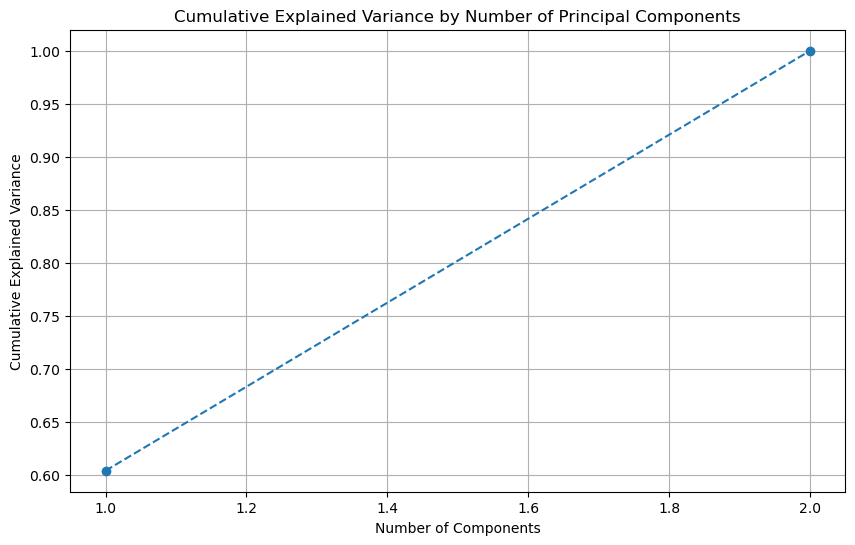

In [39]:
# Plot cumulative explained inertia
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_inertia) + 1), cumulative_explained_inertia, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()

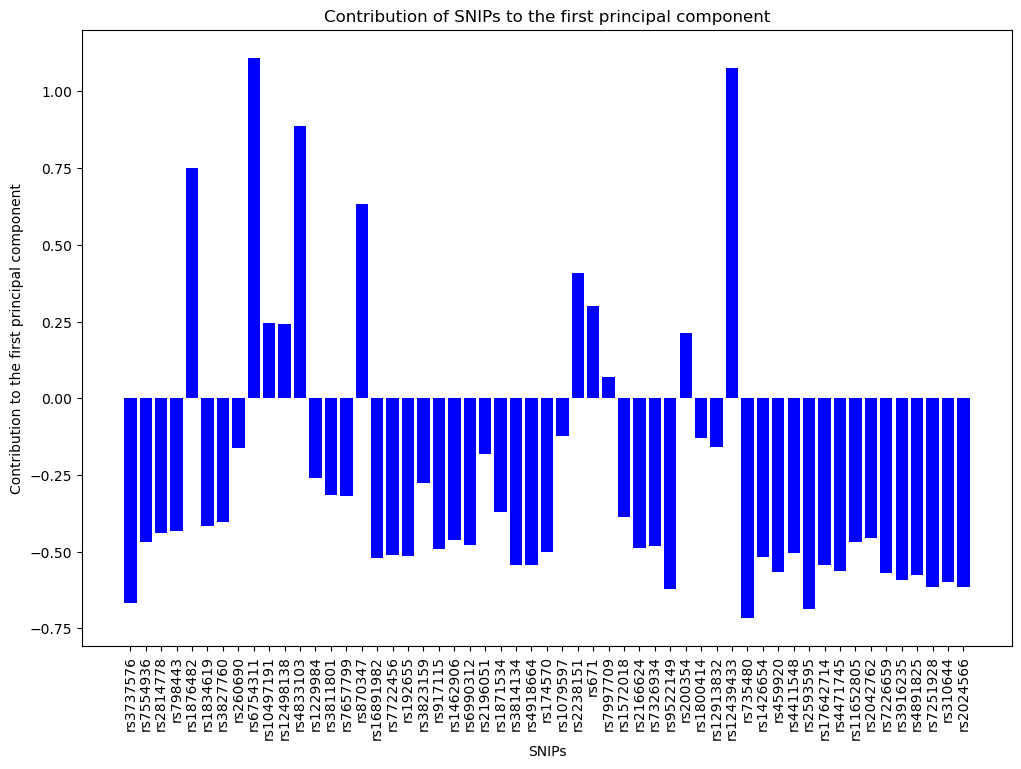

In [40]:
## FIRST PRINCIPAL COMPONENT
# Sum the contributions of each SNIP to the first principal component
num_snips = len(X.columns)
snip_contributions = np.zeros(num_snips)

for i in range(num_snips):
    snip_contributions[i] = principal_components.iloc[2*i, 0] + principal_components.iloc[2*i+1, 0]

# Plot the SNIP contributions to first principal component
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(range(num_snips), snip_contributions, tick_label=X.columns, color='blue')
plt.xticks(rotation=90)
plt.xlabel('SNIPs')
plt.ylabel('Contribution to the first principal component')
plt.title('Contribution of SNIPs to the first principal component')
plt.show()

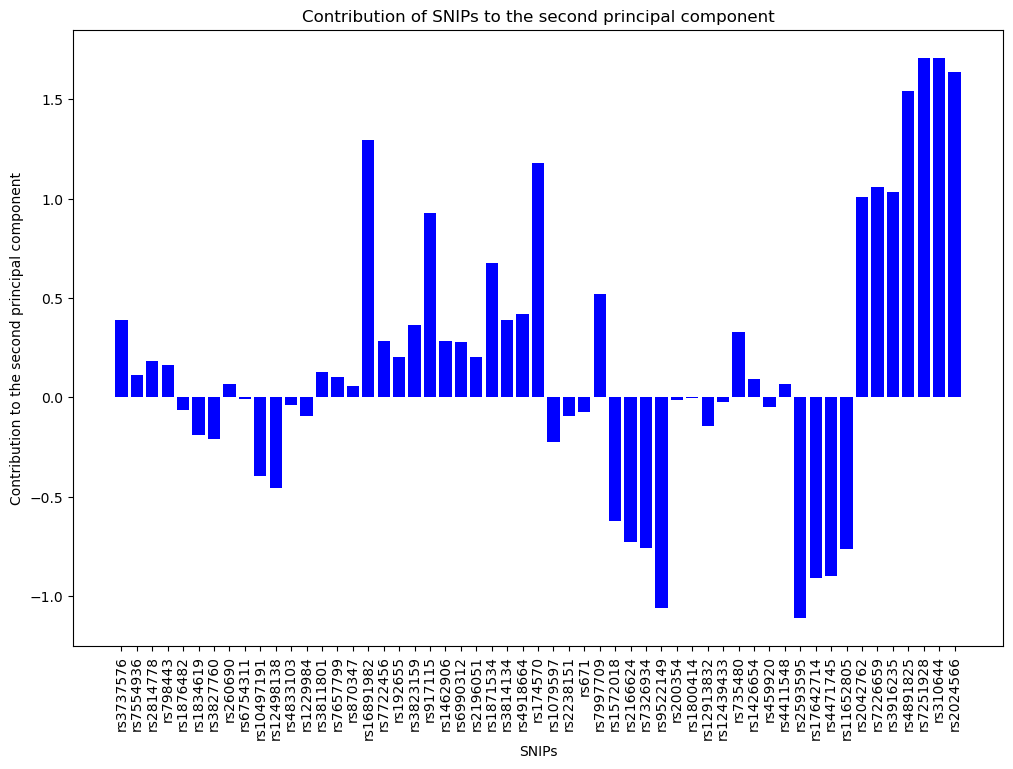

In [41]:
## SECOND PRINCIPAL COMPONENT
# Sum the contributions of each SNIP to the second principal component
num_snips = len(X.columns)
snip_contributions = np.zeros(num_snips)

for i in range(num_snips):
    snip_contributions[i] = principal_components.iloc[2*i, 1] + principal_components.iloc[2*i+1, 1]

# Plot the SNIP contributions to second principal component
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(range(num_snips), snip_contributions, tick_label=X.columns, color='blue')
plt.xticks(rotation=90)
plt.xlabel('SNIPs')
plt.ylabel('Contribution to the second principal component')
plt.title('Contribution of SNIPs to the second principal component')
plt.show()